In [1]:
using PyPlot
using Iterators

In [2]:
unit=transpose([cos(π/6),sin(π/6)]);

In [109]:
a=transpose([2*cos(π/6),0]);
b=[cos(π/6),1+sin(π/6)];

In [95]:
Nx=4
Ny=3
Nb=Nx*Ny
Nw=Nb
N=Nx*Ny*2

bM=transpose(repeat(b,outer=[1,Nx]))

Xb=Array{Float64}(Nb,2);
Xw=Array{Float64}(Nw,2);

Cb=Array{Bool}(Nb,2^Nb);
Cw=Array{Bool}(Nw,2^Nw);

Bondsw=Array{Int64}(Nw,3);
Bondsb=Array{Int64}(Nb,3);

function armod(x,y)
    if x>y || x==0 || x<0 
        return mod(x-1,y)+1
    else
        return x
    end
end

armod (generic function with 1 method)

In [101]:
for i in 1:Nx
    Xb[i,:]=(i-1)*a;
    Xw[i,:]=unit+(i-1)*a;
end

for j in 2:Ny
    Xb[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xb[1:Nx,:]+(j-1)*bM;
    Xw[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xw[1:Nx,:]+(j-1)*bM;
end

In [104]:
for i in 1:Nb
    Bondsb[i,1]=i;
    Bondsw[i,1]=i;
    Bondsb[i,2]=armod(i-1,Nb);
    Bondsw[i,2]=armod(i+1,Nw);
    Bondsb[i,3]=armod(i-Nx,Nb);
    Bondsw[i,3]=armod(i+Nx,Nw);
end

In [ ]:
w, h = plt[:figaspect](.5)
figure(figsize=(w,h))
scatter(Xb[:,1],Xb[:,2],s=100*ones(Xb[:,1]))
scatter(Xw[:,1],Xw[:,2],s=200*ones(Xw[:,1]))

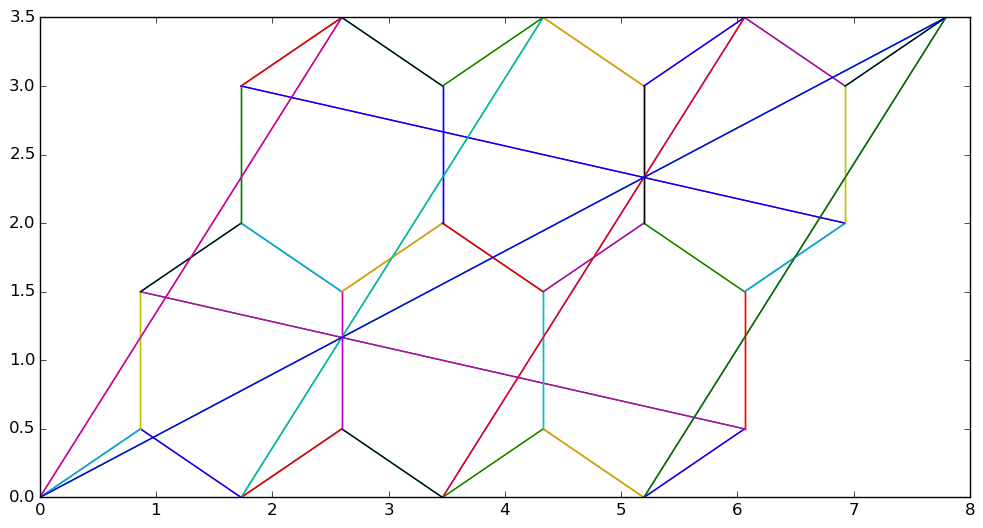

In [106]:
w, h = plt[:figaspect](.5)
figure(figsize=(w,h))
for i in 1:Nb
    #println(Xb[i,1],' ',Bondsb[i,1])
    xx=[Xb[i,1], Xw[Bondsb[i,1],1] ]
    yx=[Xb[i,2], Xw[Bondsb[i,1],2] ]
    plot(xx,yx)
        
    xx=[Xb[i,1], Xw[Bondsb[i,2],1] ]
    yx=[Xb[i,2], Xw[Bondsb[i,2],2] ]
    plot(xx,yx)
    
    #println(i,' ',Bonds[i,3])
    xx=[Xb[i,1], Xw[Bondsb[i,3],1] ]
    yx=[Xb[i,2], Xw[Bondsb[i,3],2] ]
    plot(xx,yx)
    
    xx=[Xw[i,1], Xb[Bondsw[i,1],1] ]
    yx=[Xw[i,2], Xb[Bondsw[i,1],2] ]
    plot(xx,yx)
        
    xx=[Xw[i,1], Xb[Bondsw[i,2],1] ]
    yx=[Xw[i,2], Xb[Bondsw[i,2],2] ]
    plot(xx,yx)
    
    #println(i,' ',Bonds[i,3])
    xx=[Xw[i,1], Xb[Bondsw[i,3],1] ]
    yx=[Xw[i,2], Xb[Bondsw[i,3],2] ]
    plot(xx,yx)
end

In [99]:
Bondsb[:,3], Bondsw[:,3]

([5,6,7,8,9,10,11,12,1,2,3,4],[9,10,11,12,1,2,3,4,5,6,7,8])

In [108]:
collect(product(repeated(0:1,3)...))

8-element Array{Tuple{Int64,Int64,Int64},1}:
 (0,0,0)
 (1,0,0)
 (0,1,0)
 (1,1,0)
 (0,0,1)
 (1,0,1)
 (0,1,1)
 (1,1,1)